# The Emotional Faces of the Public Opinion

## The Problem 

- Due to the design of attentional-based algorithms, most social media users experience echo chambers

- This minimizes the ability to understand a complete picture of public opinion(and narrows individual opinion)

- Is there a way to quickly access a different side to the story?

## The Aim

- This project's aim is to input a word/trend/topic or hashtag, and a sentiment (positive, negative, or many others). The model would generate bullet points summarising the key points of the subject with the appropriate sentiment, based on public opinion. (If possible could even add a location parameter)

- Twitter is the home of contemporary public opinion, and therefore the perfect place to start

- Let's look at some data to get a better understanding

Or WordCloud ??!


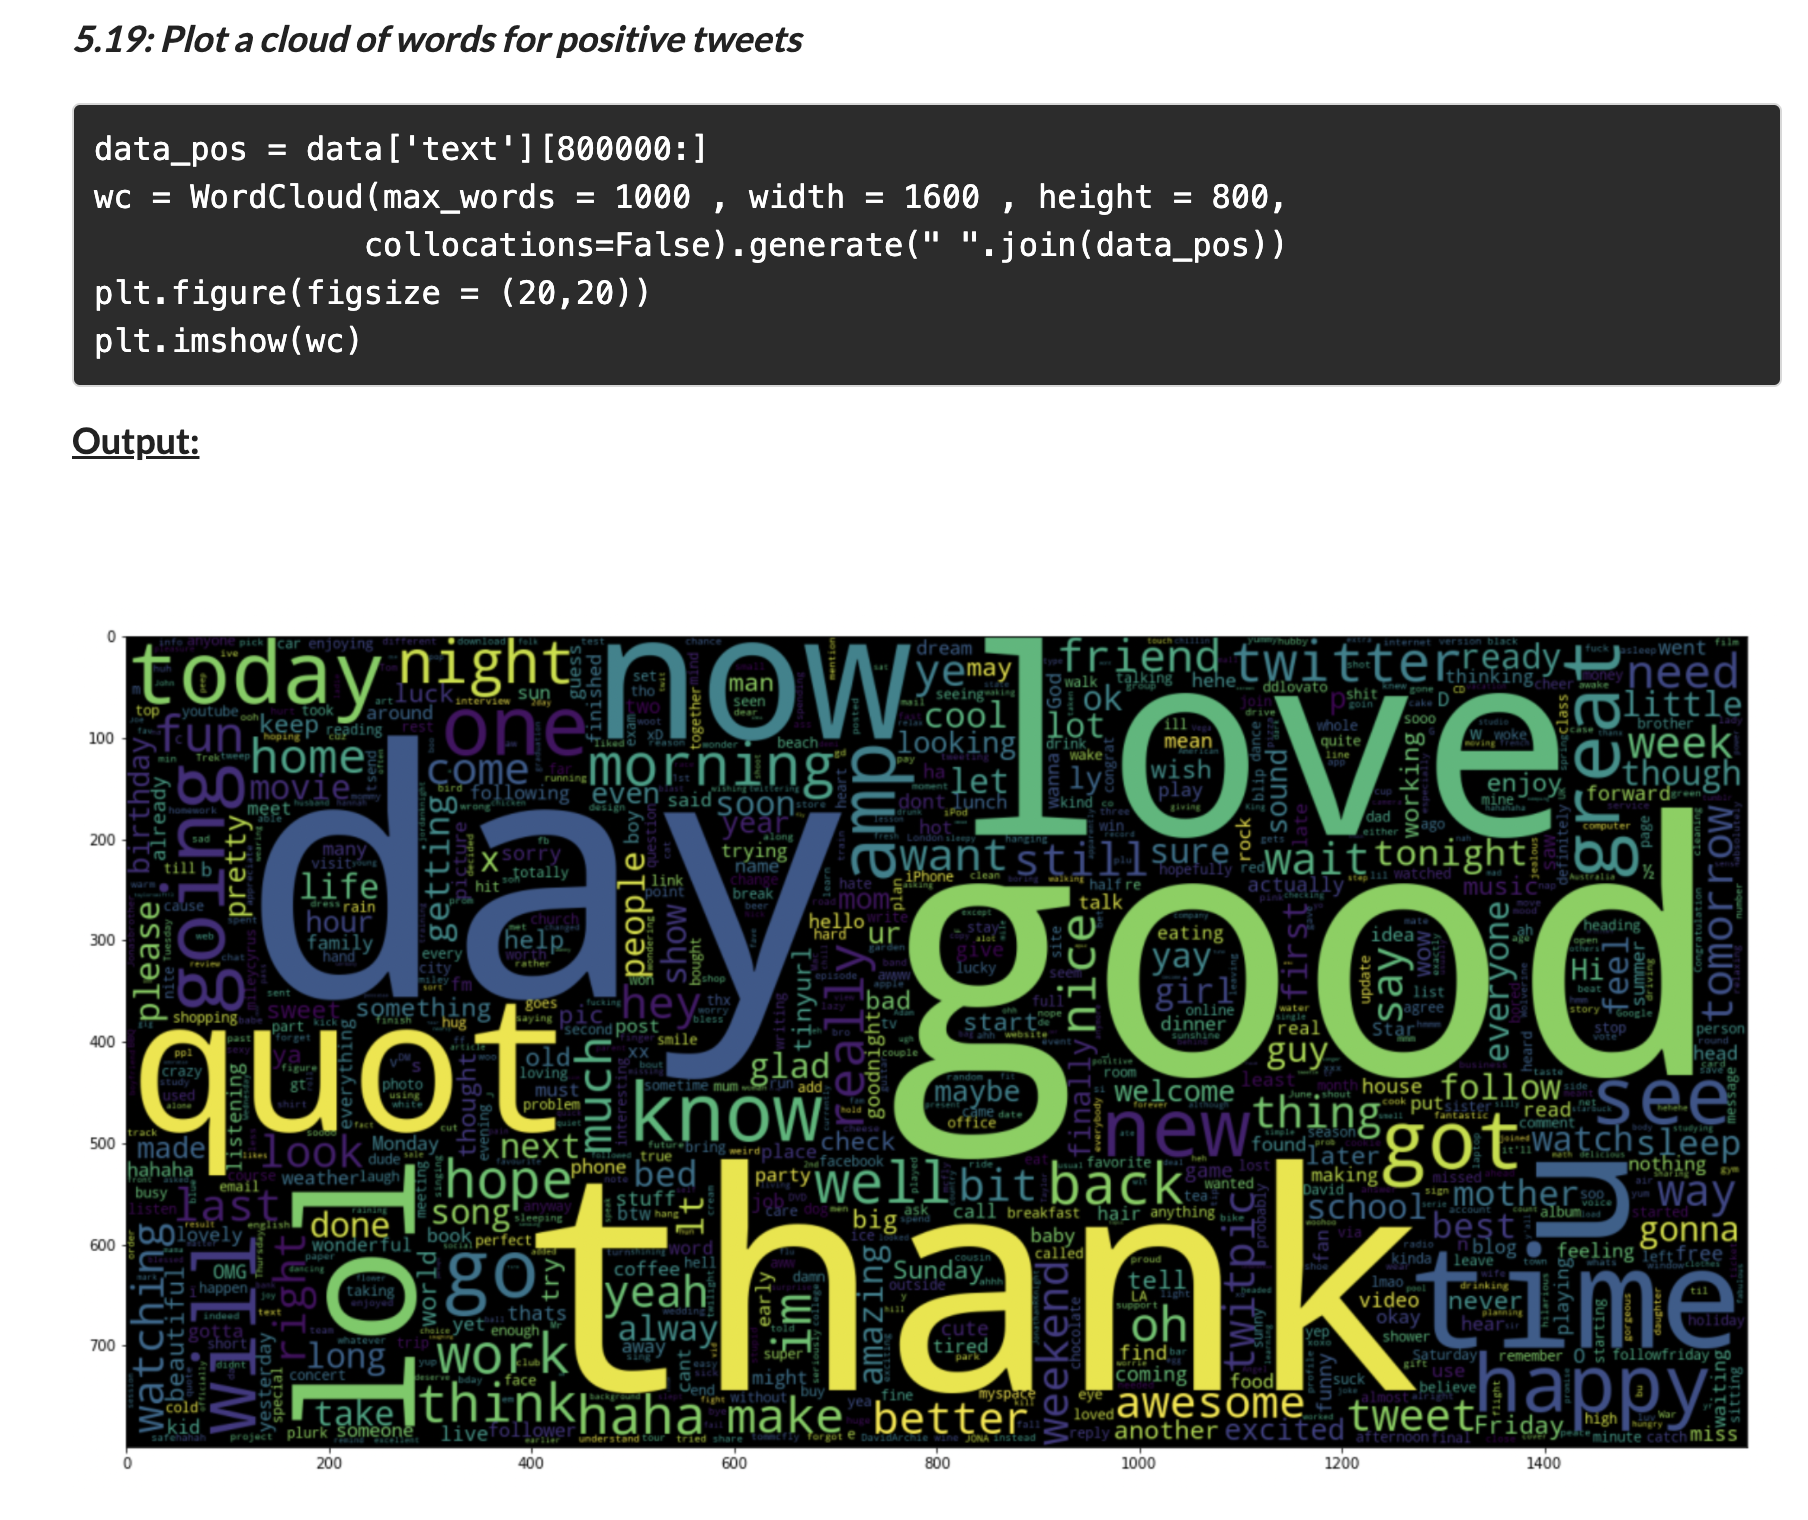

## Twitter Data

### Authentification keys

In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd


print("You got this!")



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



# count = 1

You got this!


### Search/queries

Let's use a simple example of Licorice Pizza, an award nominated but highly controversial movie recently released.

In [ ]:
tweets = []

for tweet in tweepy.Cursor(api.search_tweets, q = "#LicoricePizza", count=10, since='2022-01-28', lang = "en").items(200):

#     print(count)
#     count += 1

    try: 
        data = [tweet.created_at, tweet.id, tweet.text, tweet.retweet_count, tweet.favorite_count, tweet.lang]
        data = tuple(data)
        tweets.append(data)

    except tweepy.TweepError as e:
        print(e.reason)
        continue

    except StopIteration:
        break

# df = pd.DataFrame(tweets, columns = ['created_at','tweet_id', 'tweet_text', "retweet_count", "favorite_count", "lang"])

# """Add the path to the folder you want to save the CSV file in as well as what you want the CSV file to be named inside the single quotations"""
# df.to_csv(path_or_buf = '/Users/caselyhayford/Desktop/Twitter Experiments/Tweets.csv/', index=False) 

Just some of the query possibilities:

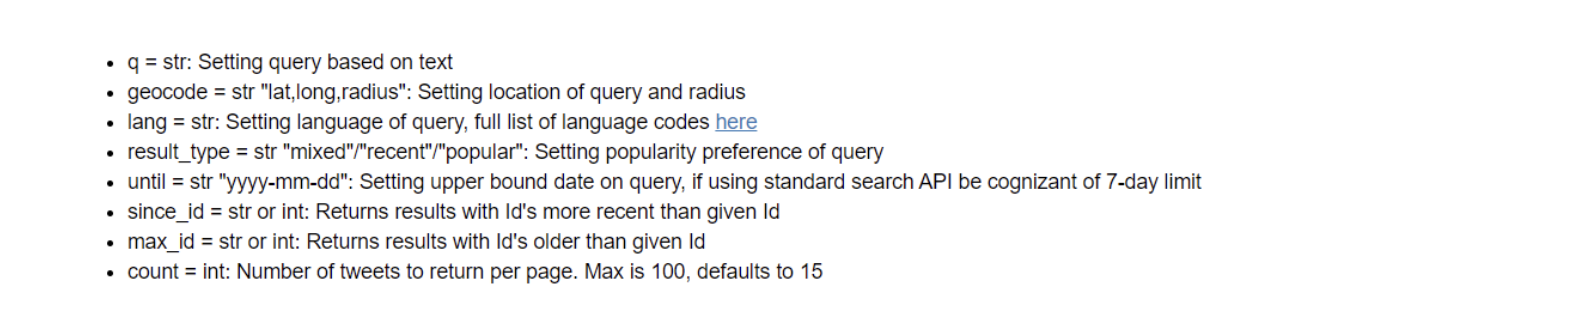

### DataFrame Work 

In [7]:
df = pd.DataFrame(tweets, columns = ['created_at','tweet_id', 'tweet_text', "retweet_count", "favorite_count", "lang"])


In [3]:
df.shape

(200, 6)

In [9]:
df.head(10)

,created_at,tweet_id,tweet_text,retweet_count,favorite_count,lang
0,2022-02-19 11:20:56+00:00,1494995410510823424,A 15-year-old falling in love with a 25-year-o...,0,0,en
1,2022-02-19 11:20:47+00:00,1494995374364405760,"""Don't be creepy,"" says the 25 year old to a 1...",0,0,en
2,2022-02-19 11:11:40+00:00,1494993078721159169,RT @universaluk: The nominations are in. #Lico...,2,0,en
3,2022-02-19 11:08:21+00:00,1494992245241442304,#LicoricePizza is too good,0,0,en
4,2022-02-19 10:59:34+00:00,1494990035552112642,RT @cineastmemes: Finally it's now available i...,1,0,en
5,2022-02-19 10:34:34+00:00,1494983743538630658,now watching #LicoricePizza FINALLY!!!! https:...,0,1,en
6,2022-02-19 10:08:17+00:00,1494977127514447874,#LicoricePizza is now on vod I repeat #Licoric...,0,0,en
7,2022-02-19 10:02:28+00:00,1494975663542915075,Finally it's now available in our channel the ...,1,2,en
8,2022-02-19 10:01:39+00:00,1494975461515923460,watching #LicoricePizza and there’s an actual ...,0,0,en
9,2022-02-19 09:57:46+00:00,1494974480262729729,Finallllllly #LicoricePizza 😌😌 https://t.co/Dn...,0,0,en


### Example of Sentiment opinions

In [6]:
print(df["tweet_text"][0])

A 15-year-old falling in love with a 25-year-old should not be normalized or romanticized regardless of gender. #LicoricePizza


A negative sentiment highlighting the age gap issue

In [8]:
print(df["tweet_text"][199])

What a fantastic soundtrack (lovely cover too)! Discovered new favourites thanks to Paul Thomas Anderson. Can't wai… https://t.co/mguHg4buyL


In [10]:
print(df["tweet_text"][3])

#LicoricePizza is too good


Some positive tweets, talking about quality and the amazing soundtrack 

## Modelling, Sentimental Analysis and Text Generation

- Two Models would potentially have to be built:
    - One that would predict the sentiment of a tweet and place that tweet in the appropriate sentiment category
    
    - The other would take the appropriate sentiment category of tweets and generate output
    
     - The more advanced (very complicated) goal would be for the output to be generated summary bulletpoints ([text generation](https://towardsdatascience.com/tagged/text-generation)). 
     
    - Otherwise a simpler approach would be to generate key words or a wordcloud, most likely using LDA topic modelling. 

### Transfer Learning

- Luckily we are not the first to play around with such ideas and we will be able to use [transfer learning](https://towardsdatascience.com/transfer-learning-in-nlp-for-tweet-stance-classification-8ab014da8dde) to help us! 

# Thank You for listening !!! 